<h1> Evaluando modelos de Machine Learning </h1>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.decomposition import PCA 
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

In [2]:
df = pd.read_csv('C:/Users/chech/PC Febrero 2023/CoderHouse/Data Scients/proyectoCoder/finalProject/data/movDic.csv')

C:\Users\chech\AppData\Local\Temp\ipykernel_13208\474200707.py:1: DtypeWarning: Columns (29,34,35,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/chech/PC Febrero 2023/CoderHouse/Data Scients/proyectoCoder/finalProject/data/movDic.csv')


<h2> Feature Engineering </h2>

In [3]:
# Reduccoón de dataset, eliminando las variables con mayor cantidad de valores nulos.
df_1 = df[['ID. Grupo','Nombre Grupo', 'ID. Origen', 'Nombre Origen', 'ID. Canal', 'Nombre Canal', 'ID. Terminal', 'Nombre Terminal', 'ID. Transaccion','Nombre Transaccion',
           'Error','Nombre Error', 'Valor','Fecha Transaccion', 'Codigo Entidad Orgien','Cooperativa Terminal','Serial Terminal', 'Tipo Cuenta 1',
           'Cuenta 1','Tipo Documento','Documento']]

# Data wrangling: Las transacciones de consulta, registrar valor 0 (cero) en la columna "Valor"
df_1.loc[df_1['Nombre Transaccion'].str.contains('Consul'), 'Valor'] = 0

In [4]:
# Actualizar los valores de la columna "Valor" según la condición
df_1.loc[df_1['Nombre Error'] != 'Exito', 'Valor'] = 0

def rangos(valor):
    if valor > 100000000:
        return '+ 100 m'
    elif valor > 50000000 and valor <= 100000000:
        return '50 m-100 m'
    elif valor > 20000000 and valor <= 50000000:
        return '20 m-50 m'
    elif valor > 5000000 and valor <= 20000000:
        return '5 m-20 m'
    elif valor > 1000000 and valor <= 5000000:
        return '1 m-5 m'
    elif valor > 200000 and valor <= 1000000:
        return '200-1 m'
    elif valor > 50000 and valor <= 200000:
        return '50-200'
    elif valor > 10000 and valor <= 50000:
        return '10-50'
    elif valor > 1 and valor <= 10000:
        return '1-10'
    else:
        return 'Cero'
df_1['NombreRango'] = df_1['Valor'].apply(rangos)

C:\Users\chech\AppData\Local\Temp\ipykernel_13208\3190226987.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['NombreRango'] = df_1['Valor'].apply(rangos)


In [5]:
df_2 = df_1[['ID. Grupo', 'ID. Origen', 'ID. Canal','Nombre Canal','ID. Terminal', 'ID. Transaccion','Nombre Transaccion','Error','Nombre Error','Valor','Fecha Transaccion', 'Codigo Entidad Orgien', 'Tipo Cuenta 1'
             ,'Tipo Documento','Documento', 'NombreRango']]

# Convertir la columna 'Fecha Transaccion' a tipo datetime
df_2['Fecha Transaccion'] = pd.to_datetime(df_2['Fecha Transaccion'])

# Aplicar el formato deseado a la columna 'Fecha Transaccion'
df_2['Fecha Transaccion'] = df_2['Fecha Transaccion'].dt.strftime('%d/%m/%Y')

C:\Users\chech\AppData\Local\Temp\ipykernel_13208\2455127376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Fecha Transaccion'] = pd.to_datetime(df_2['Fecha Transaccion'])
C:\Users\chech\AppData\Local\Temp\ipykernel_13208\2455127376.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Fecha Transaccion'] = df_2['Fecha Transaccion'].dt.strftime('%d/%m/%Y')


In [6]:
# Eliminar las filas con valores no finitos en la columna "Documento"
df_2 = df_2.dropna(subset=['Documento'])

# Convertir los valores en la columna "Documento" de tipo float64 a int64
df_2["Documento"] = df_2["Documento"].astype('int64')

<p> Crear nueva columna para hacer una categoria binaria, indicando si la transacción tiene error o no.

In [7]:
# Función para asignar valores en función de la columna "Error"
def asignar_exito(row):
    if row["Error"] == 0 or row["Error"] == 900:
        return 1
    else:
        return 0
df_2["Exito1-0"] = df_2.apply(asignar_exito, axis=1)

In [8]:
df_3 = df_2[['ID. Grupo', 'ID. Origen', 'ID. Canal', 'ID. Terminal', 'ID. Transaccion', 'Valor', 'Documento', 'Exito1-0']]
df_4 = df_3.copy()

<h4> Implementación de Label Encoding,  </h4>
<p>  El propósito principal del Label Encoding es permitir que los algoritmos de aprendizaje automático trabajen con datos categóricos de una manera que sea comprensible, El Label Encoding asigna un valor numérico único a cada categoría en una columna categórica. Cada categoría se mapea a un número, lo que permite representar esas categorías en forma numérica en los algoritmos.

In [9]:
# Creación de instancia de LabelEncoder
label_encoder = LabelEncoder()

df_4["ID. Grupo"] = label_encoder.fit_transform(df_4["ID. Grupo"])

df_4["ID. Terminal"] = label_encoder.fit_transform(df_4["ID. Terminal"])

df_4["ID. Transaccion"] = label_encoder.fit_transform(df_4["ID. Transaccion"])

In [10]:
df_4.sample(6)

,ID. Grupo,ID. Origen,ID. Canal,ID. Terminal,ID. Transaccion,Valor,Documento,Exito1-0
777280,0,6,0,0,3,535000,43041406,1
646044,0,3,1,3,3,600000,15047744,1
612909,0,3,1,5,3,60000,13375387,1
1077362,0,3,1,3,3,400000,1069740514,1
1080285,0,1,2,7,0,92400,52242820,1
943751,0,7,7,15,3,400000,1075264385,1


<h1> Regresión Logística para Predicción de Transacciones Exitosas o con Error </h1>
<p> La Regresión Logística se aplica en problemas de clasificación, como el que nos vamos a realizar: predecir si futuras transacciones serán exitosas o resultarán en un error. 
<h3> Aplicación en Predicción de Transacciones: </h3>
<p> En el contexto de la predicción de transacciones exitosas o con error, la Regresión Logística puede aprovechar diversas características relacionadas con cada transacción, como el canal de origen, el tipo de cuenta, el monto involucrado y otros atributos relevantes. Estos atributos se utilizan como variables predictoras para estimar la probabilidad de que una transacción específica termine en error.
<h2> EDA: </h2>

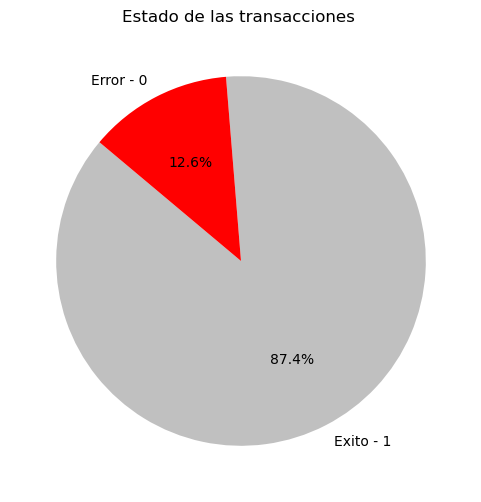

In [11]:
suma_valores = df_2["Exito1-0"].value_counts()

# Crear la gráfica de torta
plt.figure(figsize=(6, 6))
plt.pie(suma_valores, labels=["Exito - 1", "Error - 0"], autopct='%1.1f%%', colors=['silver', 'red'], startangle=140)

plt.title("Estado de las transacciones ")

plt.show()

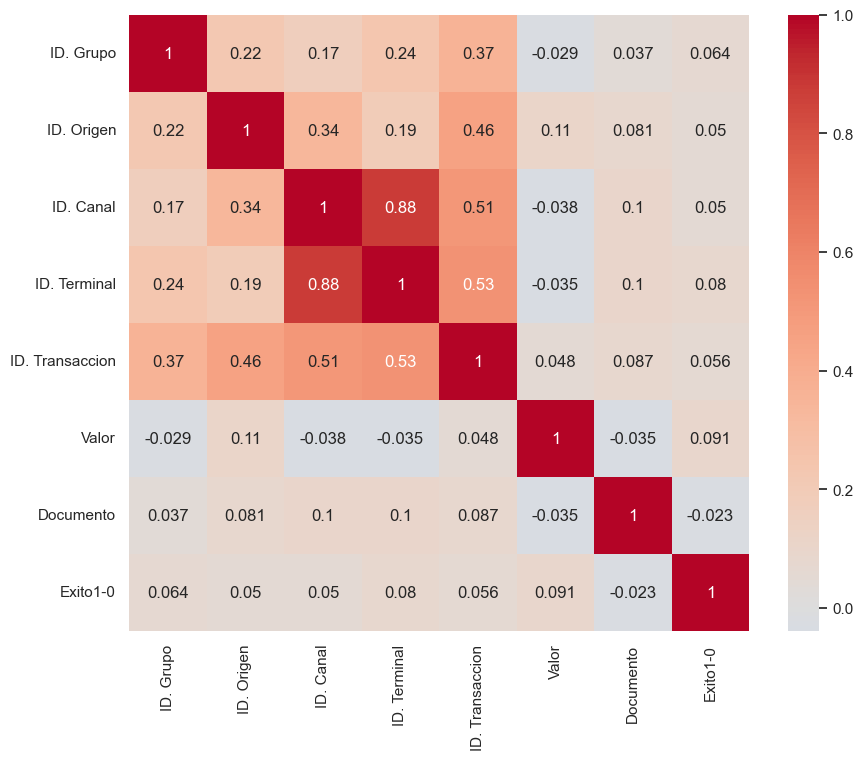

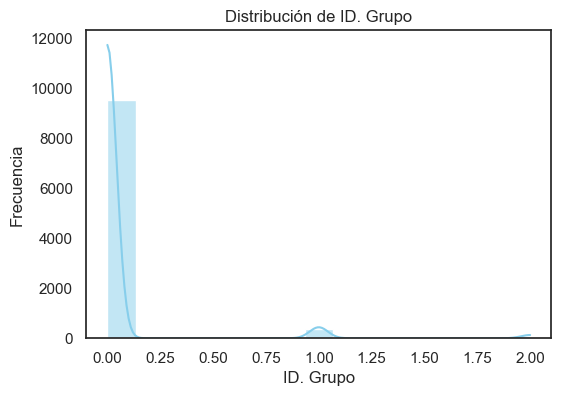

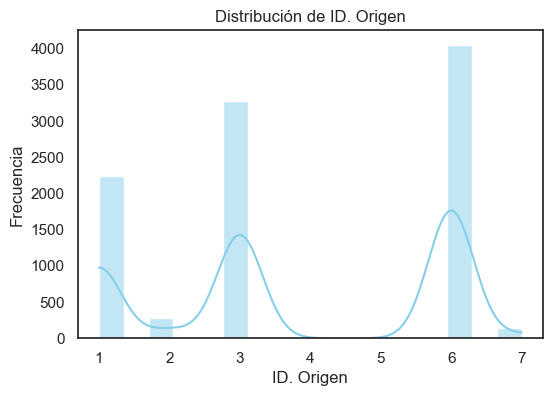

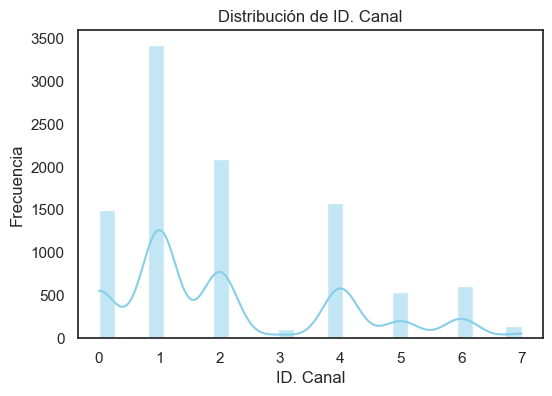

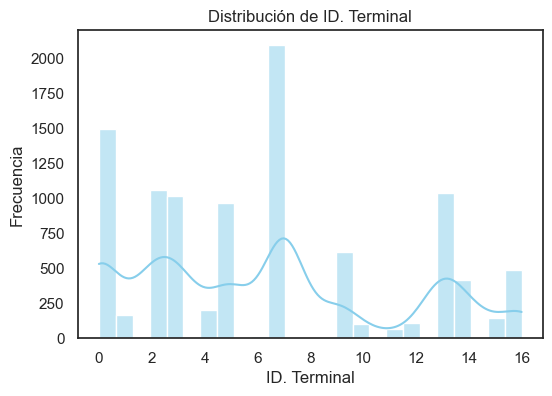

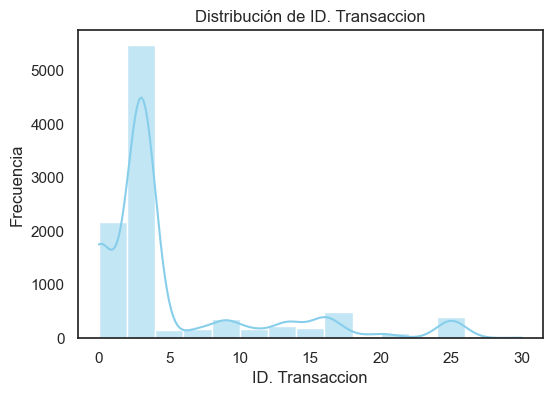

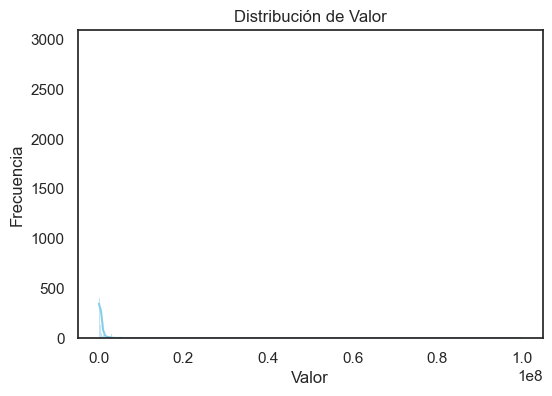

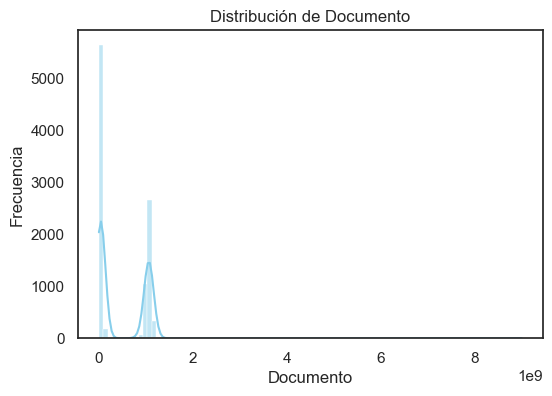

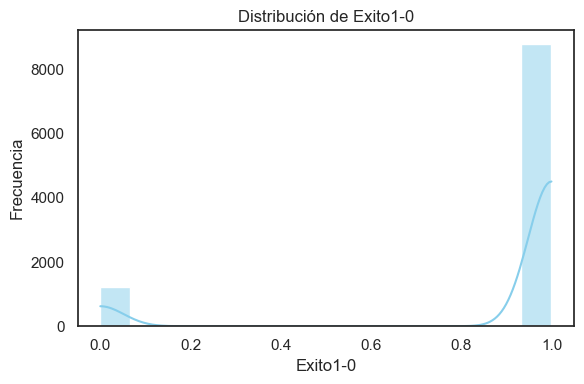

In [12]:
# Cargar las bibliotecas y configurar estilo de las gráficas
sns.set(style="white")
plt.figure(figsize=(10, 8))

# Tomar una muestra aleatoria del DataFrame
sample_size = 10000
df_sample = df_4.sample(n=sample_size, random_state=42)

# Crear un mapa de calor (heatmap) de correlación para la muestra
correlation_matrix = df_sample.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

numeric_columns = df_sample.select_dtypes(include=[float, int]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_sample, x=col, kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<h1> Aplicación del Análisis de Componentes Principales (PCA) en la Predicción Transaccional </h1>
<p> En nuestro proyecto de predicción transaccional, utilizamos una técnica poderosa llamada Análisis de Componentes Principales (PCA) para reducir la dimensionalidad y resaltar las características más relevantes en nuestros datos transaccionales. PCA es una herramienta clave en la exploración y procesamiento de datos de alta dimensionalidad, como aquellos presentes en procesos transaccionales.

In [16]:
df_features = df_4.drop(['Exito1-0'], axis=1)
df_target = df_4['Exito1-0']

df_features = StandardScaler().fit_transform(df_features)

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)

In [17]:
print(df_4.shape)
print(X_train.shape)
print(y_train.shape)

(1034740, 8)
(724318, 7)
(724318,)


In [19]:
pca = PCA(n_components=3)
pca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

<p> A continuación se realiza la grafica con el fin de validar el aporte que hacen los features al modelo.

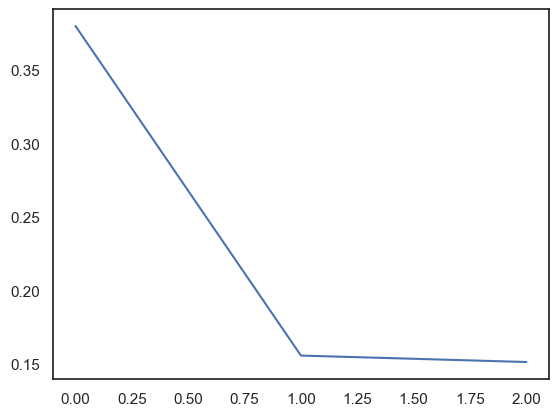

In [20]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

<h1> Logistic Regression</h1>
<h3> Evaluación del modelo </h3>

In [21]:
logistic = LogisticRegression(solver='lbfgs')

dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train,y_train)
print("SCORE PCA: ", logistic.score(dt_test, y_test))

SCORE PCA:  0.8737653903396022
